In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os.path import dirname
from random import randint
from sklearn import cluster, datasets
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from random import randint

notebook_path = os.path.abspath("Notebook_Cedrik_FeatureEngineering.ipynb")
csv_path = os.path.join(os.path.dirname(dirname(notebook_path)), "data/ks-project-edited-features.csv")
csv_path_original = os.path.join(os.path.dirname(dirname(notebook_path)), "data/ks-project-edited-numpy-pandas.csv")

In [418]:
df = pd.read_csv (csv_path, low_memory=False)
df_original = pd.read_csv (csv_path_original, low_memory=False)
df.head()

,ID,name,deadline,launched,backers,duration,year,canceled,failed,successful,...,NZ,SE,SG,US,usd_pledged_real_scaled,usd_goal_real_scaled,hour,weekday_launched,weekday_deadline,name_length
0,1000002330,The Songs of Adelaide & Abullah,2015-10-09 00:00:00,2015-08-11 12:12:28,0,59,2015,0,1,0,...,0,0,0,0,0.000000e+00,0.000009,12,Tuesday,Friday,31.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,2017-11-01 00:00:00,2017-09-02 04:43:57,15,60,2017,0,1,0,...,0,0,0,1,1.190325e-04,0.000180,4,Saturday,Wednesday,45.0
2,1000004038,Where is Hank?,2013-02-26 00:00:00,2013-01-12 00:20:50,3,45,2013,0,1,0,...,0,0,0,1,1.081666e-05,0.000270,0,Saturday,Tuesday,14.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,2012-04-16 00:00:00,2012-03-17 03:24:11,1,30,2012,0,1,0,...,0,0,0,1,4.916666e-08,0.000030,3,Saturday,Monday,49.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,2015-08-29 00:00:00,2015-07-04 08:35:03,14,56,2015,1,0,0,...,0,0,0,1,6.308082e-05,0.000117,8,Saturday,Saturday,58.0


In [419]:
list_features = ["backers","duration","usd_pledged_real_scaled","usd_goal_real_scaled", "hour","name_length"]
df_features = df[list_features].copy()
df_features.head()

,backers,duration,usd_pledged_real_scaled,usd_goal_real_scaled,hour,name_length
0,0,59,0.000000e+00,0.000009,12,31.0
1,15,60,1.190325e-04,0.000180,4,45.0
2,3,45,1.081666e-05,0.000270,0,14.0
3,1,30,4.916666e-08,0.000030,3,49.0
4,14,56,6.308082e-05,0.000117,8,58.0


In [420]:
df_features["name_length"].fillna(df_features["name_length"].agg("mean"), inplace=True)

In [421]:
df_features["name_length"].agg("mean")
df_features[df_features_cluster.isna().any(axis=1)]

,backers,duration,usd_pledged_real_scaled,usd_goal_real_scaled,hour,name_length


#### Normaliseren von den restlichen Features

In [422]:
scaler = MinMaxScaler()

df_features[list(df_features.columns)] = scaler.fit_transform(df_features[list_features])

In [423]:
df_features.head()

,backers,duration,usd_pledged_real_scaled,usd_goal_real_scaled,hour,name_length
0,0.000000,0.637363,0.000000e+00,0.000009,0.521739,0.315789
1,0.000068,0.648352,1.190325e-04,0.000180,0.173913,0.463158
2,0.000014,0.483516,1.081666e-05,0.000270,0.000000,0.136842
3,0.000005,0.318681,4.916666e-08,0.000030,0.130435,0.505263
4,0.000064,0.604396,6.308082e-05,0.000117,0.347826,0.600000


In [424]:
inertia = []
silhouette_coefficients = []
cluster_range = range(1,10)
for k in cluster_range:
    kmeans_elbow = cluster.KMeans(n_clusters=k).fit(df_features)
    inertia.append(kmeans_elbow.inertia_)
    if k >= 2:
        silhouette_coefficient = metrics.silhouette_score(df_features,kmeans_elbow.labels_, metric='euclidean', sample_size=50000,random_state=42)
        silhouette_coefficients.append(silhouette_coefficient)
        

Text(0.5, 1.0, 'Elbogendiagramm')

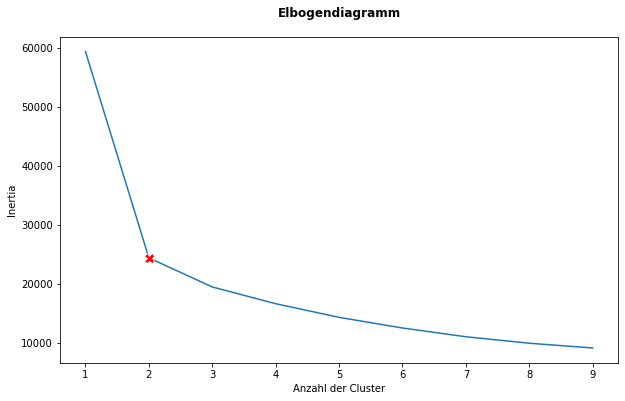

In [425]:
# deutlicher Knick bei 2 Clustern. Das zeigt, dass hier die optimale Wahl für die Anzahl der Cluster liegt, 
# da dort die größte Verbesserung der Abstände zu den Clusterschwerpunkten ist
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x = cluster_range,y = inertia, marker='X', markerfacecolor='red', markersize=10, markevery=[1])
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Inertia')
plt.title("Elbogendiagramm", pad = 20, fontweight="bold")

Text(0.5, 1.0, 'Vergleich der Silhouetten Koeffizienten')

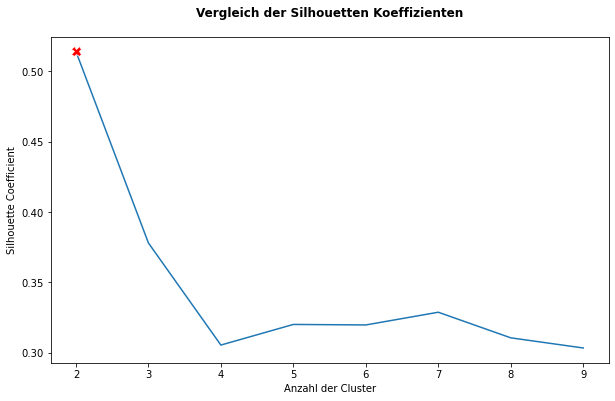

In [426]:
# Höchster Wert bei 2 Clustern
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x = range(2,10),y = silhouette_coefficients, marker='X', markerfacecolor='red', markersize=10,markevery=[0])
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Silhouette Coefficient')
plt.title("Vergleich der Silhouetten Koeffizienten", pad = 20, fontweight="bold")

In [427]:
# Verteilung gleich unabhängig von random_states
for j in range(5):
    rs = randint(0, 100)
    kmeans_rs = cluster.KMeans(n_clusters=2, random_state=rs).fit(df_features)
    print("Random: ", rs)
    for i in range(2):
        print("Name:", i, "Größe: ", list(kmeans_rs.labels_).count(i))

Random:  80
Name: 0 Größe:  230547
Name: 1 Größe:  139667
Random:  56
Name: 0 Größe:  139667
Name: 1 Größe:  230547
Random:  87
Name: 0 Größe:  230547
Name: 1 Größe:  139667
Random:  7
Name: 0 Größe:  139667
Name: 1 Größe:  230547
Random:  44
Name: 0 Größe:  230547
Name: 1 Größe:  139667


In [478]:
# Die Evaluation mit der Zielklasse gibt nicht das gewünschte Ergebniss aus beim Einsetzen von df["successful"] oder
# df["failed"] als Zielklasse, obwohl die Verteilung der beiden Cluster ungefähr diesen entsprechen. Daher 
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance that has already been trained
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data whose clusters should be evaluated.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the supervised clustering metrics.
    """
    
    # Inertia
    results = [name, kmeans.inertia_]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(data, kmeans.labels_,
                                 metric="euclidean", sample_size=25000)
    ]
    
    # Supervised metrics which require the true labels and cluster
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.fowlkes_mallows_score,
        metrics.rand_score,
    ]
    results += [m(labels, kmeans.labels_) for m in clustering_metrics]

    # Show the results
    formatter_result = ("{:9s}\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [429]:
# Aufrufen der Benchmark mit unserem trainierten kmeans und einer zufälligen Zuweisung (zum Vergleich)
# Fügen Sie hier auch Ihren günstigeren random_state von oben ein!

print(82 * '_')
print('init\t\tinertia\tsil\thom\tcom\tv-meas\trand\tfowlkes')

# unser kmeans-Modell (zur Sicherheit neu trainieren)
kmeans = cluster.KMeans(n_clusters=2, random_state=0).fit(df_features)
bench_k_means(kmeans=kmeans, name="k-means_0", data=df_features, labels=df["successful"])

# unser kmeans-Modell (random_state 42)
kmeans = cluster.KMeans(n_clusters=2, random_state=42).fit(df_features)
bench_k_means(kmeans=kmeans, name="k-means_42", data=df_features, labels=df["successful"])

# unser kmeans-Modell (10x trainiert; das Modell mit der besten inertia gewinnt)
kmeans = cluster.KMeans(n_clusters=2, n_init=10).fit(df_features)
bench_k_means(kmeans=kmeans, name="k-means_opti", data=df_features, labels=df["successful"])

# zufällige Cluster-Zuordnung erzeugen
kmeans_rand = cluster.KMeans(init="random", n_clusters=2, random_state=0).fit(df_features)
bench_k_means(kmeans=kmeans_rand, name="random", data=df_features, labels=df["successful"])

# Cluster-Zuordnung mit k-means++
kmeans_kplus = cluster.KMeans(init="k-means++", n_clusters=2, random_state=0).fit(df_features)
bench_k_means(kmeans=kmeans_kplus, name="k-means++", data=df_features, labels=df["successful"])

print(82 * '_')

__________________________________________________________________________________
init		inertia	sil	hom	com	v-meas	rand	fowlkes
k-means_0	24417	0.513	0.000	0.000	0.000	0.533	0.501
k-means_42	24417	0.516	0.000	0.000	0.000	0.533	0.501
k-means_opti	24417	0.515	0.000	0.000	0.000	0.533	0.501
random   	24417	0.514	0.000	0.000	0.000	0.533	0.501
k-means++	24417	0.513	0.000	0.000	0.000	0.533	0.501
__________________________________________________________________________________


In [430]:
kmeans = KMeans(init="k-means++", n_clusters=2, random_state=42).fit(df_features)
clustergroessen = []
clustergroessen.append(list(kmeans.labels_).count(0))
clustergroessen.append(list(kmeans.labels_).count(1))

In [431]:
clustergroessen

[139667, 230547]

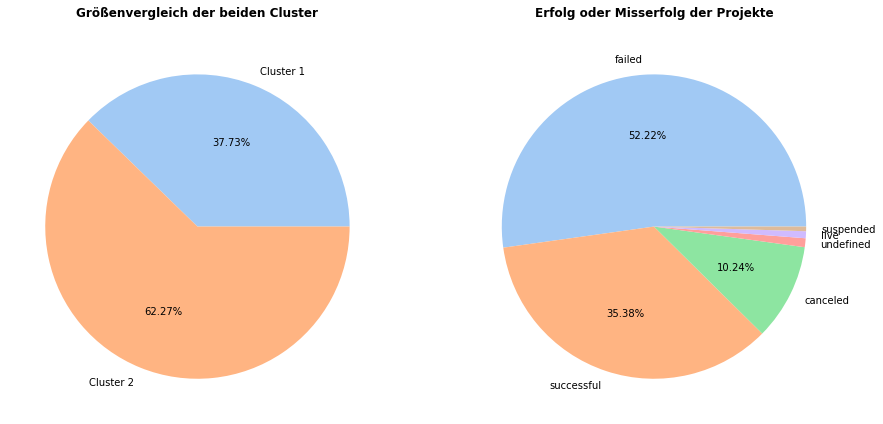

In [432]:
# Hier ist gut erkennbar dass die beiden Cluster wahrscheinlich danach geordnet sind, ob ein Projekt fehlgschlagen ist 
# oder nicht. Es wäre wahrscheinlich noch sinnvoll die Daten mit dem state (canceled, undefined, live und suspended)
# zu entfernen aus dem Datensatz
fig, ax = plt.subplots(figsize=(15,15), ncols=2)
colors = sns.color_palette('pastel')[0:6]

def my_autopct(pct):
    return ('%.2f%%' % pct) if pct >= 10 else ''
#create pie chart
ax[0].pie(clustergroessen, labels= ["Cluster 1","Cluster 2"],colors = colors, autopct=my_autopct)
ax[0].set_title("Größenvergleich der beiden Cluster", fontweight="bold", fontsize=12, pad=20)
ax[1].pie(df_original['state'].value_counts(), labels= df_original['state'].value_counts().index.tolist(),colors = colors, autopct=my_autopct)
ax[1].set_title("Erfolg oder Misserfolg der Projekte", fontweight="bold", fontsize=12, pad=20)
plt.show()

In [433]:
df_features_cluster = df_features
#df_features_cluster[list(df_features_cluster.columns)] = scaler.inverse_transform(df_features_cluster[list_features])
df_features_cluster["cluster"] = kmeans.labels_
df_features_cluster.head()

,backers,duration,usd_pledged_real_scaled,usd_goal_real_scaled,hour,name_length,cluster
0,0.000000,0.637363,0.000000e+00,0.000009,0.521739,0.315789,1
1,0.000068,0.648352,1.190325e-04,0.000180,0.173913,0.463158,0
2,0.000014,0.483516,1.081666e-05,0.000270,0.000000,0.136842,0
3,0.000005,0.318681,4.916666e-08,0.000030,0.130435,0.505263,0
4,0.000064,0.604396,6.308082e-05,0.000117,0.347826,0.600000,0


In [434]:
df_features_cluster.groupby('cluster').mean()

,backers,duration,usd_pledged_real_scaled,usd_goal_real_scaled,hour,name_length
cluster,,,,,,
0,0.000365,0.369315,0.000334,0.000257,0.174451,0.355333
1,0.000562,0.361573,0.000520,0.000279,0.808455,0.356733


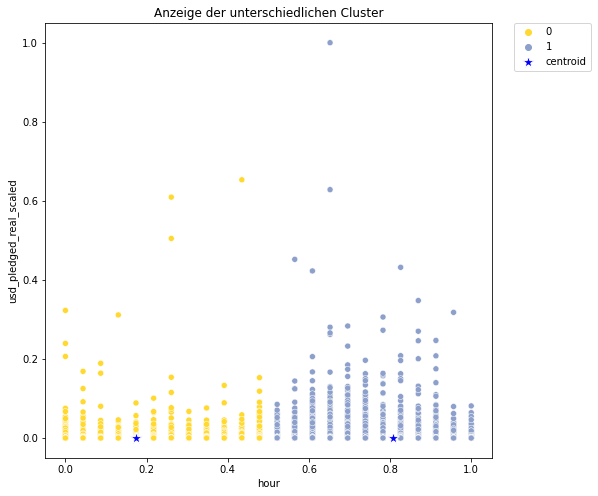

In [435]:
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_features, x="hour", y="usd_pledged_real_scaled", hue="cluster", palette='Set2_r')
sns.scatterplot(x=kmeans.cluster_centers_[:,4], y=kmeans.cluster_centers_[:,2], color='blue',marker='*',
                label='centroid', s=150)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Anzeige der unterschiedlichen Cluster')
plt.show()

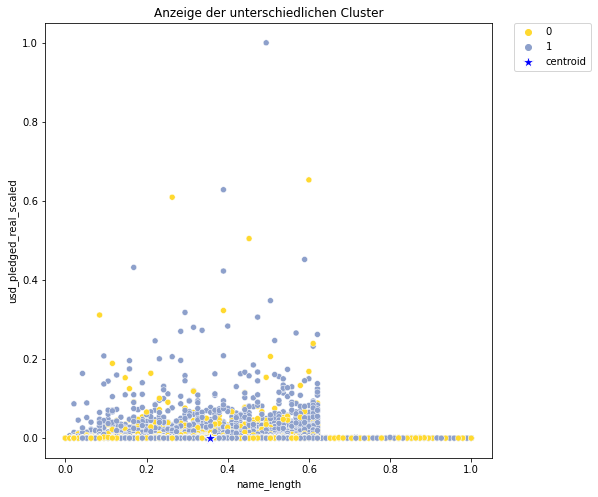

In [436]:
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_features, x="name_length", y="usd_pledged_real_scaled", hue="cluster", palette='Set2_r')
sns.scatterplot(x=kmeans.cluster_centers_[:,5], y=kmeans.cluster_centers_[:,2], color='blue',marker='*',
                label='centroid', s=150)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Anzeige der unterschiedlichen Cluster')
plt.show()

Bei der Betrachtung dieser Werte, wird deutlich warum wir so schlechte Werte für die Homogenität, die Vollständigkeit und das V-Maß erhalten. Es ist erkennbar, dass die Projekte in beiden Clustern im Durchschnitt einen höheren Betrag eingebracht haben als die durchschnittlichen Zielbeträge. Davon lässt sich ableiten, dass in beiden Clustern genügend erfolgreiche Projekte vorhanden sind damit ein solcher Wert erreicht werden kann. Somit wurden die Cluster doch nicht wie im ersten Schritt angenommen nach "successful" und "failed" getrennt.
Bei der weiteren Betrachtung ist erkennbar, dass sich vor allem die durschnittliche Anzahl der "backers" und die "hour" unterscheiden. Durch die betrachtlich höhere Anzahl von Backern in Cluster 1, liegt der Wert für die erzielten Beträge auch deutlich höher als bei Cluster 2. Des Weiteren haben wir zuvor bei der näheren Betrachtung unseres Datensatzes festgestellt, dass um 18 Uhr die meisten Projekte erstellt werden. Dies würde auch erklären, warum das Cluster 1, daher ca. 25% größer sein könnte als Cluster 0. 
Die Cluster wurden daher vermutlich so aufgeteilt zu den Hotspots nach der Erstellung und der Anzahl der backers.


Eine Möglichkeit könnte es nun sein das Feature "hour" zu entfernen und dann zu schauen in wie weit sich die Clusteraufteilung verändert.

## Kmeans ohne das Feature hour

In [437]:
df_without_hour = df_features.drop(columns=["hour","cluster"])

In [444]:
df_without_hour.head()

,backers,duration,usd_pledged_real_scaled,usd_goal_real_scaled,name_length
0,0.000000,0.637363,0.000000e+00,0.000009,0.315789
1,0.000068,0.648352,1.190325e-04,0.000180,0.463158
2,0.000014,0.483516,1.081666e-05,0.000270,0.136842
3,0.000005,0.318681,4.916666e-08,0.000030,0.505263
4,0.000064,0.604396,6.308082e-05,0.000117,0.600000


In [477]:
inertia_wh = []
silhouette_coefficients_wh = []
cluster_range_wh = range(1,10)
for k in cluster_range_wh:
    kmeans_elbow_wh = cluster.KMeans(n_clusters=k).fit(df_without_hour)
    inertia_wh.append(kmeans_elbow_wh.inertia_)
    if k >= 2:
        silhouette_coefficient_wh = metrics.silhouette_score(df_without_hour,kmeans_elbow_wh.labels_, metric='euclidean', sample_size=25000,random_state=42)
        silhouette_coefficients_wh.append(silhouette_coefficient_wh)

Text(0.5, 1.0, 'Elbogendiagramm')

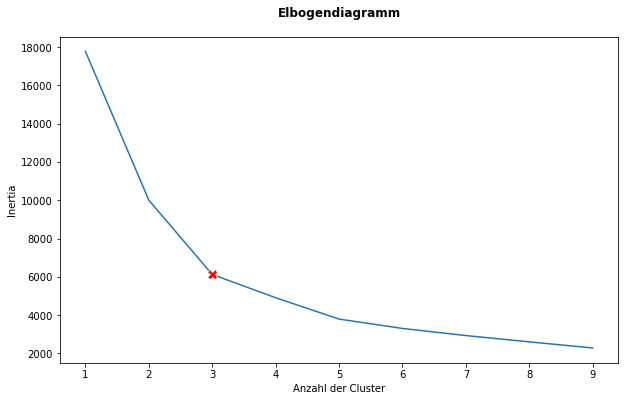

In [446]:
# deutlicher Knick bei 2 Clustern. Das zeigt, dass hier die optimale Wahl für die Anzahl der Cluster liegt, 
# da dort die größte Verbesserung der Abstände zu den Clusterschwerpunkten ist
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x = cluster_range_wh,y = inertia_wh, marker='X', markerfacecolor='red', markersize=10, markevery=[2])
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Inertia')
plt.title("Elbogendiagramm", pad = 20, fontweight="bold")

Text(0.5, 1.0, 'Vergleich der Silhouetten Koeffizienten')

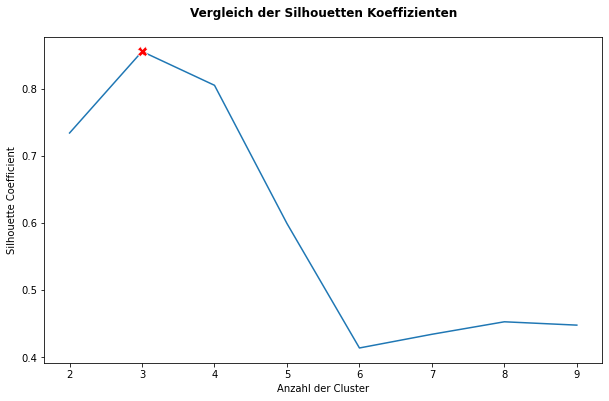

In [479]:
# Höchster Wert bei 2 Clustern
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x = range(2,10),y = silhouette_coefficients_wh, marker='X', markerfacecolor='red', markersize=10,markevery=[1])
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Silhouette Coefficient')
plt.title("Vergleich der Silhouetten Koeffizienten", pad = 20, fontweight="bold")

In [448]:
# Verteilung gleich unabhängig von random_states
for j in range(5):
    rs = randint(0, 100)
    kmeans_rs = cluster.KMeans(n_clusters=3, random_state=rs).fit(df_without_hour)
    print("Random: ", rs)
    for i in range(3):
        print("Name:", i, "Größe: ", list(kmeans_rs.labels_).count(i))

Random:  15
Name: 0 Größe:  55659
Name: 1 Größe:  150560
Name: 2 Größe:  163995
Random:  73
Name: 0 Größe:  163995
Name: 1 Größe:  150560
Name: 2 Größe:  55659
Random:  19
Name: 0 Größe:  55659
Name: 1 Größe:  163995
Name: 2 Größe:  150560
Random:  16
Name: 0 Größe:  55659
Name: 1 Größe:  150560
Name: 2 Größe:  163995
Random:  56
Name: 0 Größe:  163995
Name: 1 Größe:  55659
Name: 2 Größe:  150560


In [ ]:
kmeans_test = cluster.KMeans(n_clusters=3).fit(df_without_hour)
metrics.silhouette_score(df_without_hour,kmeans_test.labels_, metric='euclidean', sample_size=25000,random_state=42)

In [482]:
# Aufrufen der Benchmark mit unserem trainierten kmeans und einer zufälligen Zuweisung (zum Vergleich)
# Fügen Sie hier auch Ihren günstigeren random_state von oben ein!

print(82 * '_')
print('init\t\tinertia\tsil\thom\tcom\tv-meas\trand\tfowlkes')

# unser kmeans-Modell (zur Sicherheit neu trainieren)
kmeans_wh = cluster.KMeans(n_clusters=3, random_state=0).fit(df_without_hour)
bench_k_means(kmeans=kmeans_wh, name="k-means_0", data=df_without_hour, labels=df["successful"])

# unser kmeans-Modell (random_state 42)
kmeans_wh = cluster.KMeans(n_clusters=3, random_state=42).fit(df_without_hour)
bench_k_means(kmeans=kmeans_wh, name="k-means_42", data=df_without_hour, labels=df["successful"])

# unser kmeans-Modell (10x trainiert; das Modell mit der besten inertia gewinnt)
kmeans_wh = cluster.KMeans(n_clusters=3, n_init=10).fit(df_without_hour)
bench_k_means(kmeans=kmeans_wh, name="k-means_opti", data=df_without_hour, labels=df["successful"])

# zufällige Cluster-Zuordnung erzeugen
kmeans_rand_wh = cluster.KMeans(init="random", n_clusters=3, random_state=0).fit(df_without_hour)
bench_k_means(kmeans=kmeans_rand_wh, name="random", data=df_without_hour, labels=df["successful"])

# Cluster-Zuordnung mit k-means++
kmeans_kplus_wh = cluster.KMeans(init="k-means++", n_clusters=3, random_state=0).fit(df_without_hour)
bench_k_means(kmeans=kmeans_kplus_wh, name="k-means++", data=df_without_hour, labels=df["successful"])

print(82 * '_')

__________________________________________________________________________________
init		inertia	sil	hom	com	v-meas	rand	fowlkes
k-means_0	6124	0.856	0.010	0.007	0.008	0.453	0.489
k-means_42	6124	0.855	0.010	0.007	0.008	0.453	0.489
k-means_opti	6124	0.856	0.010	0.007	0.008	0.453	0.489
random   	6124	0.856	0.010	0.007	0.008	0.453	0.489
k-means++	6124	0.855	0.010	0.007	0.008	0.453	0.489
__________________________________________________________________________________


In [485]:
kmeans_wh = KMeans(init="k-means++", n_clusters=3, random_state=0).fit(df_without_hour)
clustergroessen_wh = []
clustergroessen_wh.append(list(kmeans_wh.labels_).count(0))
clustergroessen_wh.append(list(kmeans_wh.labels_).count(1))
clustergroessen_wh.append(list(kmeans_wh.labels_).count(2))

In [486]:
clustergroessen_wh

[55659, 150560, 163995]

In [487]:
df_without_hour_cluster = df_without_hour
#df_features_cluster[list(df_features_cluster.columns)] = scaler.inverse_transform(df_features_cluster[list_features])
df_without_hour_cluster["cluster"] = kmeans_wh.labels_
df_without_hour_cluster.head()

,backers,duration,usd_pledged_real_scaled,usd_goal_real_scaled,name_length,cluster
0,0.000000,0.637363,0.000000e+00,0.000009,0.315789,0
1,0.000068,0.648352,1.190325e-04,0.000180,0.463158,0
2,0.000014,0.483516,1.081666e-05,0.000270,0.136842,2
3,0.000005,0.318681,4.916666e-08,0.000030,0.505263,1
4,0.000064,0.604396,6.308082e-05,0.000117,0.600000,0


In [495]:
df_features_cluster.groupby('cluster').mean()

,backers,duration,usd_pledged_real_scaled,usd_goal_real_scaled,hour,name_length
cluster,,,,,,
0,0.000365,0.369315,0.000334,0.000257,0.174451,0.355333
1,0.000562,0.361573,0.000520,0.000279,0.808455,0.356733


In [489]:
df_without_hour_cluster.groupby('cluster').mean()

,backers,duration,usd_pledged_real_scaled,usd_goal_real_scaled,name_length
cluster,,,,,
0,0.000352,0.634721,0.000381,0.000707,0.346972
1,0.000595,0.321850,0.000589,0.000178,0.511780
2,0.000436,0.311931,0.000345,0.000209,0.216509


Bei der Ausführung des K-Means Algorithmus ohne das Feature hour erhalten wir das beste Ergebnis für 3 Cluster. Auch diese 3 Cluster sind nicht auf unsere gewünschte Zielklasse anwendbar, ob ein Projekt erfolgreich war oder fehlschlug. Die 3 Cluster unterscheiden sich von den vorherigen zwei in der Hinsicht, dass nun auch das die Features name_length und duration sich für die verschiedenen Cluster im Durchschnitt unterscheiden. 
Bei der Betrachtung des kleinsten Clusters 0 mit insgesamt 55659 Datenpunkten fällt auf, dass dieses die wenigsten Backer hat und der erreichte Betrag geringer ist als der Zielbetrag. Daraus lässt sich schließen, dass in diesem Cluster vermutlich die unerfolgreichsten Projekte enthalten sind. Außerdem

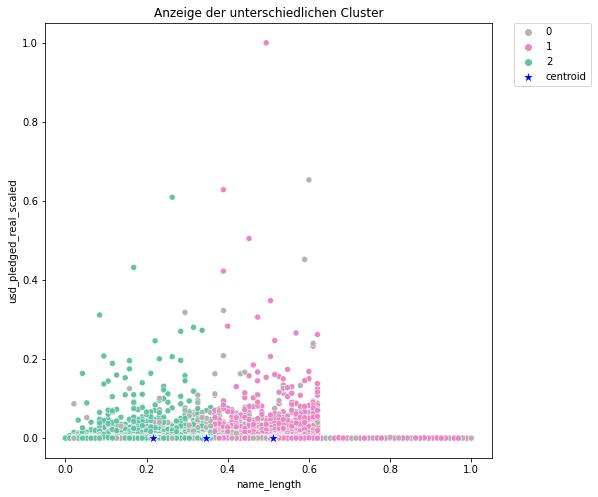

In [492]:
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_without_hour_cluster, x="name_length", y="usd_pledged_real_scaled", hue="cluster", palette='Set2_r')
sns.scatterplot(x=kmeans_wh.cluster_centers_[:,4], y=kmeans_wh.cluster_centers_[:,2], color='blue',marker='*',
                label='centroid', s=150)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Anzeige der unterschiedlichen Cluster')
plt.show()